<a href="https://colab.research.google.com/github/AI-ML-DL-EXPERT/Cat-VS-Dog-Classifier/blob/main/Dog_vs_Cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!!mkdir -p ~/.kaggle

# Here /content/Kaggle API Token/kaggle.json this is the path of the Kaggle API Tok
!cp "/content/Kaggle API Token/kaggle.json" ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:07<00:00, 287MB/s]
100% 1.06G/1.06G [00:07<00:00, 151MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten

In [ ]:
# Using Generators to load the data

train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256, 256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize

def process(image, label):
    train_ds = tf.cast(image/255., tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# Train the Model

model = Sequential()

model.add(Conv2D(32, kernel_size = (3, 3), padding = "valid", activation = "relu", input_shape  = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides = 2, padding = "valid"))

model.add(Conv2D(64, kernel_size = (3, 3), padding = "valid", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides = 2, padding = "valid"))

model.add(Conv2D(128, kernel_size = (3, 3), padding = "valid", activation = "relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides = 2, padding = "valid"))

model.add(Flatten())

model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(1, activation = "sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer = "adam", metrics = ["accuracy"], loss = "binary_crossentropy")

history = model.fit(train_ds, epochs = 5,validation_data = validation_ds)

Epoch 1/5
625/625 [==============================] - 77s 108ms/step - loss: 1.5574 - accuracy: 0.5640 - val_loss: 0.6264 - val_accuracy: 0.6406
Epoch 2/5
625/625 [==============================] - 67s 106ms/step - loss: 0.6313 - accuracy: 0.6536 - val_loss: 0.6887 - val_accuracy: 0.5842
Epoch 3/5
625/625 [==============================] - 65s 104ms/step - loss: 0.5510 - accuracy: 0.7147 - val_loss: 0.5315 - val_accuracy: 0.7268
Epoch 4/5
625/625 [==============================] - 67s 105ms/step - loss: 0.4823 - accuracy: 0.7607 - val_loss: 0.4880 - val_accuracy: 0.7708
Epoch 5/5
625/625 [==============================] - 65s 104ms/step - loss: 0.4386 - accuracy: 0.7935 - val_loss: 0.5012 - val_accuracy: 0.7684


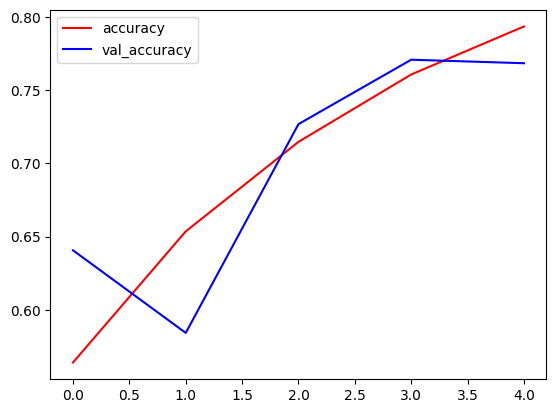

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"], color = "red", label = "accuracy")
plt.plot(history.history["val_accuracy"], color = "blue", label = "val_accuracy")
plt.legend()
plt.show()

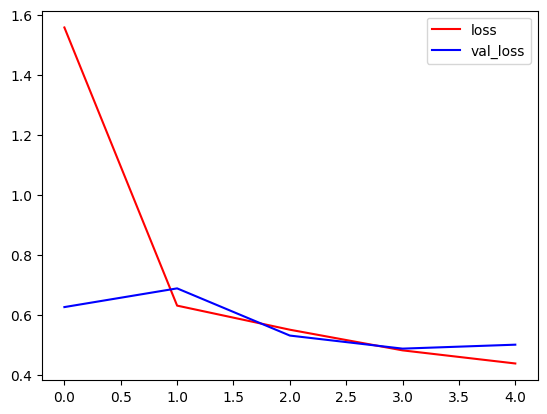

In [ ]:
plt.plot(history.history["loss"], color = "red", label = "loss")
plt.plot(history.history["val_loss"], color = "blue", label = "val_loss")
plt.legend()
plt.show()

In [ ]:
import cv2

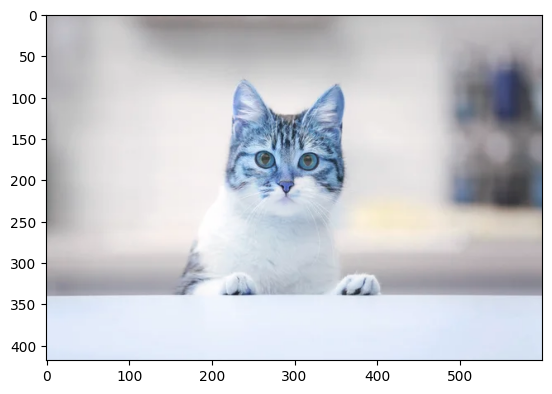

In [ ]:
test_img = cv2.imread("/content/cat.jpg")

plt.imshow(test_img)

In [ ]:
test_img.shape

(418, 600, 3)

In [ ]:
test_img = cv2.resize(test_img, (256, 256))

In [ ]:
test_input = test_img.reshape((1, 256, 256, 3))

In [ ]:
model.predict(test_input)[0][0]  # 0 Means Cat

1/1 [==============================] - 0s 19ms/step


0.0063213487

1/1 [==============================] - 0s 20ms/step


0.8960909

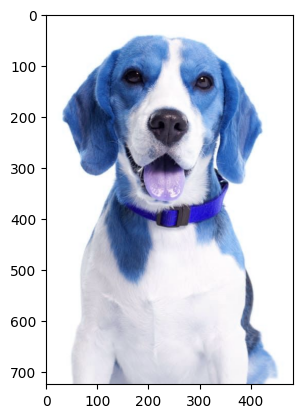

In [ ]:
test_img = cv2.imread("/content/dog.jpeg")

plt.imshow(test_img)

test_img = cv2.resize(test_img, (256, 256))
test_input = test_img.reshape((1, 256, 256, 3))

model.predict(test_input)[0][0]  # 1 Means Cat  # Mainly it's printing the probability of Cat vs Dog if the model predicted value is
                                 # less than 0.5 then it's cat else dog.